# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [88]:
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [89]:
# Check for missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# Exploratory Data Analysis (EDA)

# Distribution of Numeric Features

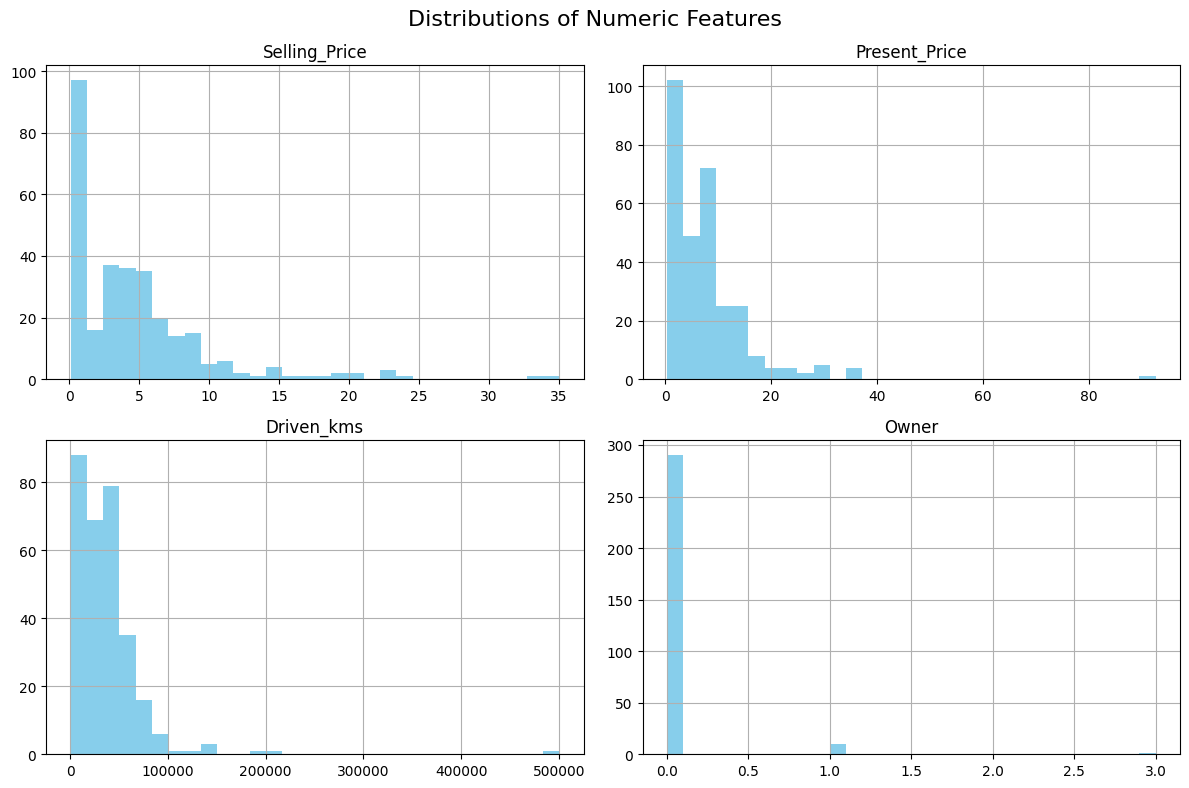

In [90]:
numeric_cols = ['Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']
df[numeric_cols].hist(bins=30, figsize=(12, 8), layout=(2, 2), color='skyblue')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

# Fuel Type Distribution

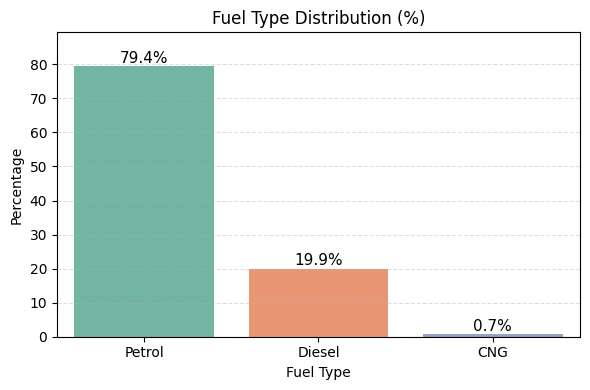

In [91]:
# Step 1: Calculate percentage
fuel_counts = df['Fuel_Type'].value_counts(normalize=True) * 100
fuel_df = fuel_counts.reset_index()
fuel_df.columns = ['Fuel_Type', 'Percentage']

# Step 2: Plot barplot with percentage
plt.figure(figsize=(6,4))
sns.barplot(data=fuel_df, x='Fuel_Type',hue='Fuel_Type', y='Percentage', palette='Set2')

# Step 3: Annotate bars with % values
for i, val in enumerate(fuel_df['Percentage']):
    plt.text(i, val + 1, f'{val:.1f}%', ha='center', fontsize=11)

plt.title("Fuel Type Distribution (%)")
plt.xlabel("Fuel Type")
plt.ylabel("Percentage")
plt.ylim(0, fuel_df['Percentage'].max() + 10)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


#  Distribution of Cars by Transmission

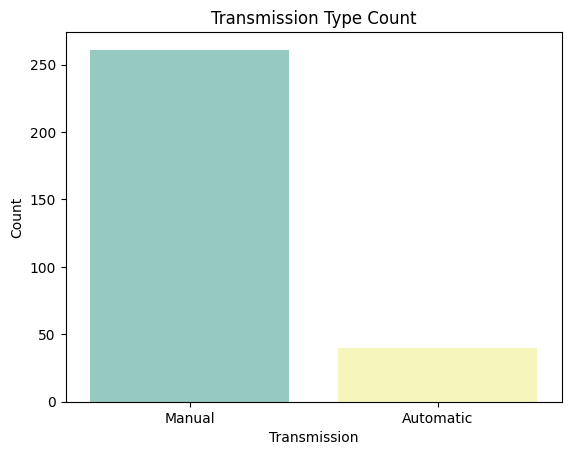

In [92]:
sns.countplot(data=df, x='Transmission',hue='Transmission', palette='Set3')
plt.title("Transmission Type Count")
plt.xlabel("Transmission")
plt.ylabel("Count")
plt.show()


# Selling Price vs Present Price

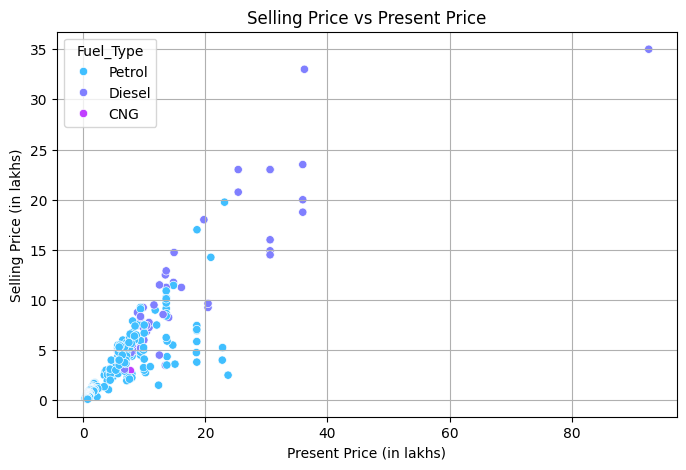

In [93]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Present_Price', y='Selling_Price', hue='Fuel_Type', palette='cool')
plt.title("Selling Price vs Present Price")
plt.xlabel("Present Price (in lakhs)")
plt.ylabel("Selling Price (in lakhs)")
plt.grid(True)
plt.show()


# Driven_kms vs Selling Price

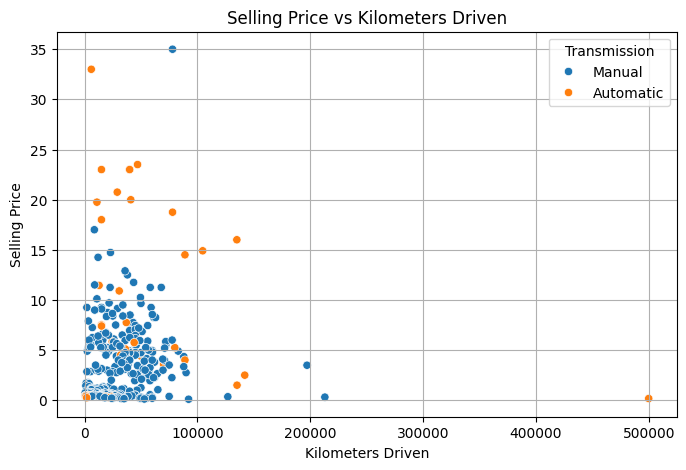

In [94]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price', hue='Transmission')
plt.title("Selling Price vs Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.grid(True)
plt.show()


# Selling Price by Owner Type

C:\Users\madhusudan kumar\AppData\Local\Temp\ipykernel_18368\3655024502.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Owner', y='Selling_Price', palette='pastel')


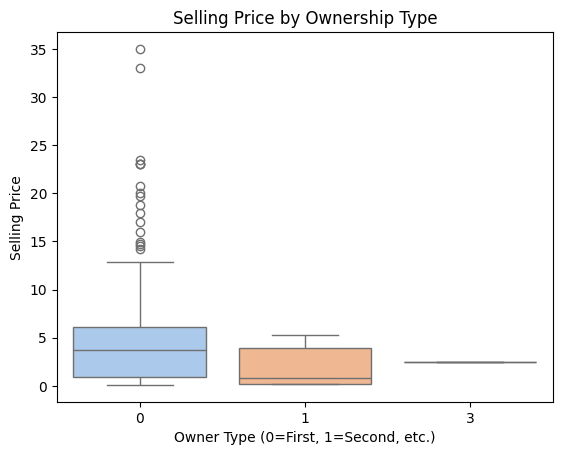

In [95]:
sns.boxplot(data=df, x='Owner', y='Selling_Price', palette='pastel')
plt.title("Selling Price by Ownership Type")
plt.xlabel("Owner Type (0=First, 1=Second, etc.)")
plt.ylabel("Selling Price")
plt.show()


# Correlation Matrix

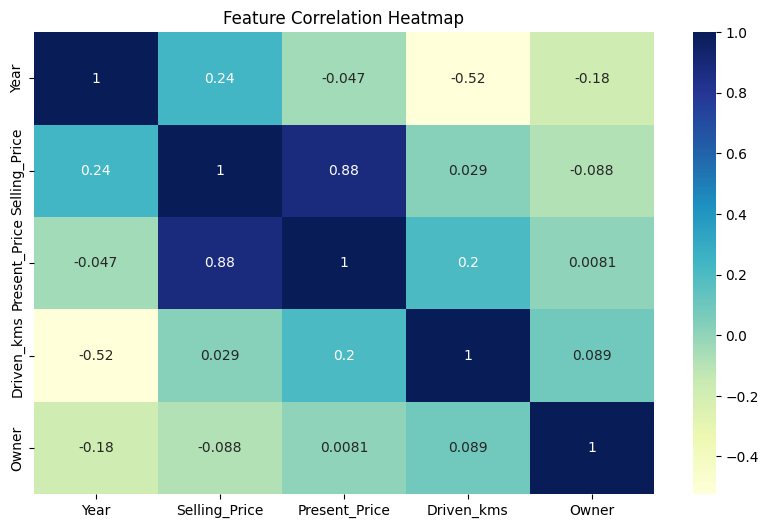

In [96]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()


# Fuel Type vs Transmission Crosstab

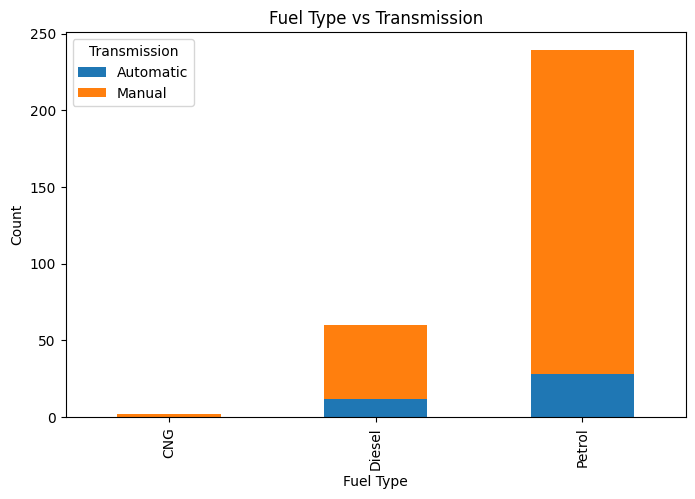

In [97]:
pd.crosstab(df['Fuel_Type'], df['Transmission']).plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Fuel Type vs Transmission")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.legend(title='Transmission')
plt.show()


# Data Preprocessing

In [98]:
# Drop Car_Name
df.drop('Car_Name', axis=1, inplace=True)

In [99]:
# Create new column Car_Age
df['Car_Age'] = 2025 - df['Year']
df.drop('Year', axis=1, inplace=True)

In [100]:
# Encode categorical features
le = LabelEncoder()
for col in ['Fuel_Type', 'Selling_type', 'Transmission']:
    df[col] = le.fit_transform(df[col])


In [101]:
df.isnull().sum()

Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
Car_Age          0
dtype: int64

# Machine Learning: Price Prediction

In [102]:
# Split Features & Target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


In [103]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#  Define & Train Models

In [105]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'R² Score': r2})


#  Show Results

In [106]:
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
print(results_df)


               Model      RMSE  R² Score
4      Random Forest  0.932724  0.962233
3      Decision Tree  1.435257  0.910575
0  Linear Regression  1.879250  0.846690
1   Ridge Regression  1.882394  0.846177
2   Lasso Regression  1.915613  0.840700


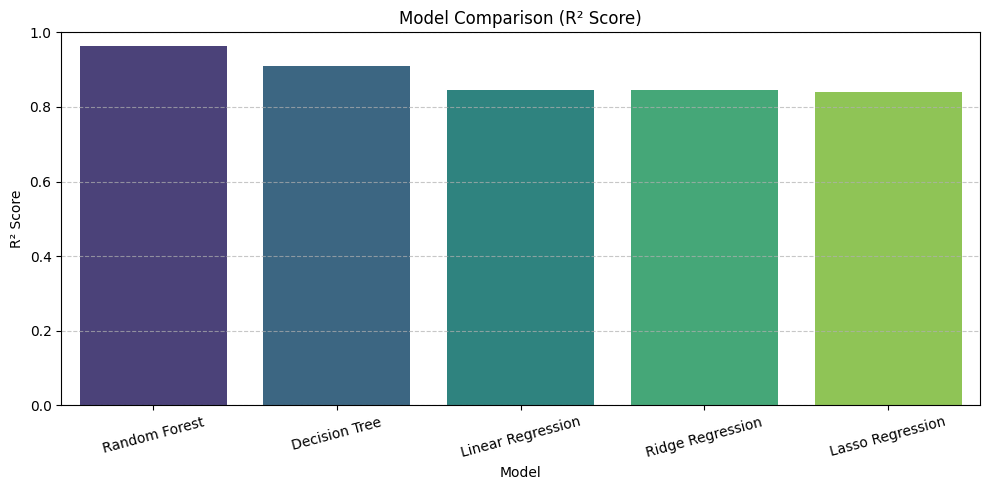

In [107]:
plt.figure(figsize=(10,5))
sns.barplot(data=results_df, x='Model',hue='Model', y='R² Score', palette='viridis')
plt.title("Model Comparison (R² Score)")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
